# **Getting Started With Images**

**Importing Libraries**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image

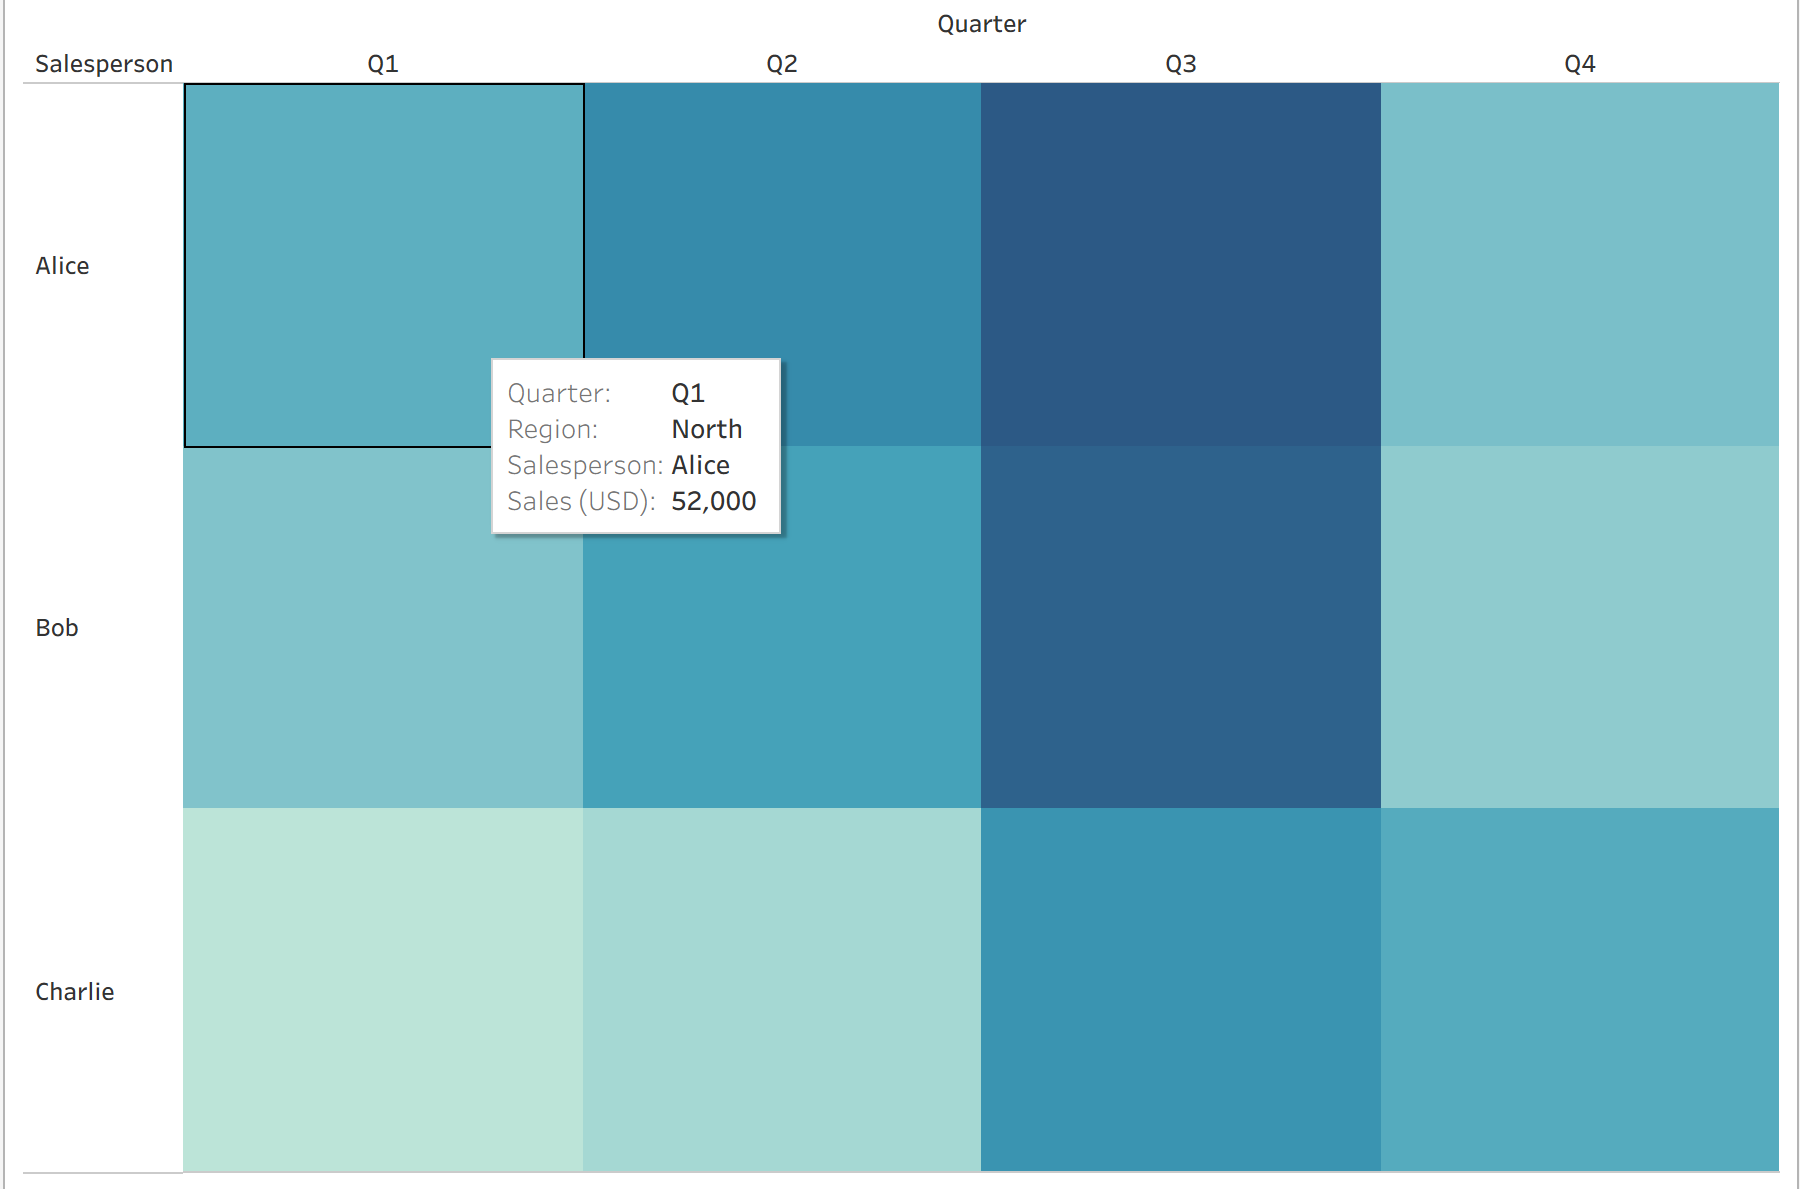

In [2]:
# Display image directly
Image(filename='C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/t1.png')

# **Reading Images with OpenCV**

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the cv2.imread() function which has the following syntax:

Function Syntax
retval **cv2.imread(filename(, flags))**

retval: Is the image if it is successfully loaded. Otherwise it is None. This may happen if the filename is wrong or the file is corrupt.

The function has 1 required input argument and one optional flag:
1. filename: This can be an absolute or relative path. This is a mandatory argument.
2. Flags: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an optional argument with a default value of cv2. IMREAD_COLOR or 1 which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the flags available.
Flags
1. cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
2. cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [3]:
# Read image as grey scale
i1=cv2.imread('C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/t1.png',0)

# Print the image data {pixel_values},element of a 2D numpy array
# Each pixel of 8-bits [0,255]
print(i1)

[[245 245 245 ... 180 180 245]
 [245 245 245 ... 180 180 245]
 [245 245 245 ... 180 180 245]
 ...
 [245 245 245 ... 180 180 245]
 [245 245 245 ... 180 180 245]
 [245 245 245 ... 180 180 245]]


# **Display Image Attribuites**

In [4]:
# print image size
print("Image size is: ",i1.shape)

# print data-type of image
print("Data-type of image is ", i1.dtype)

Image size is:  (1189, 1800)
Data-type of image is  uint8


# **Display Images with Matplotlib**

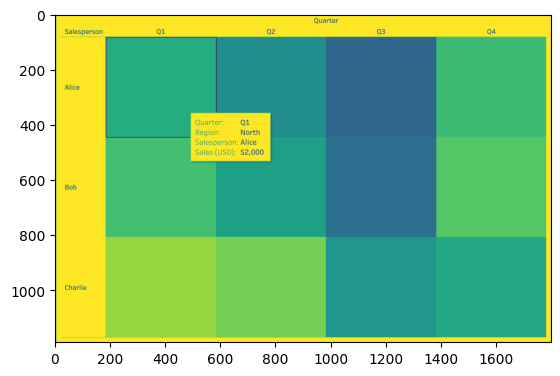

In [5]:
plt.imshow(i1)

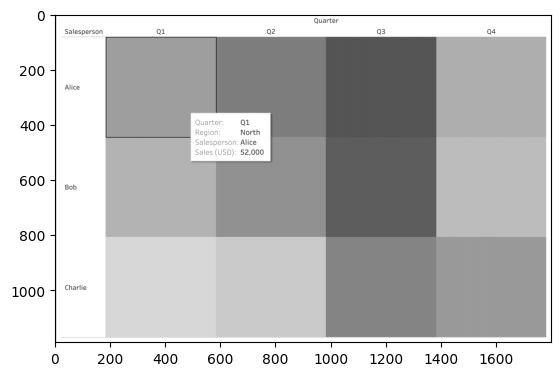

In [6]:
# set color map to gray scale 
plt.imshow(i1,cmap='grey')

# **Working with color images**

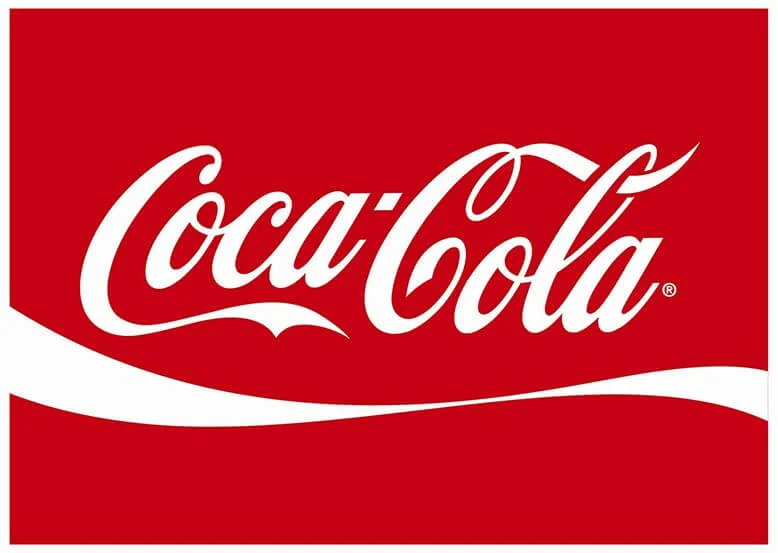

In [7]:
# read and display colour image
Image('C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/c1.png')

**Colour img with OpenCV**

In [8]:
c1=cv2.imread('C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/c1.png',1)
print("Size of image: ",c1.shape)
print("Image type: ",c1.dtype)

Size of image:  (553, 778, 3)
Image type:  uint8


**Colour img with Matplot**

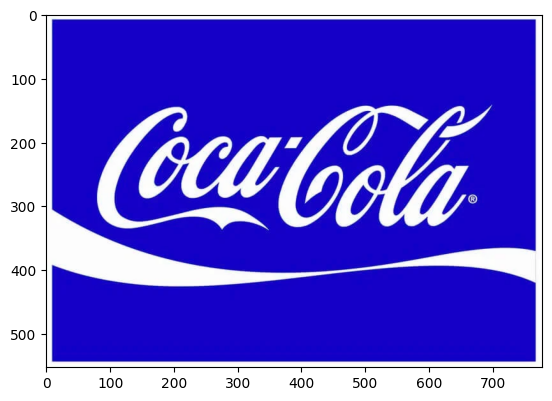

In [9]:
plt.imshow(c1)


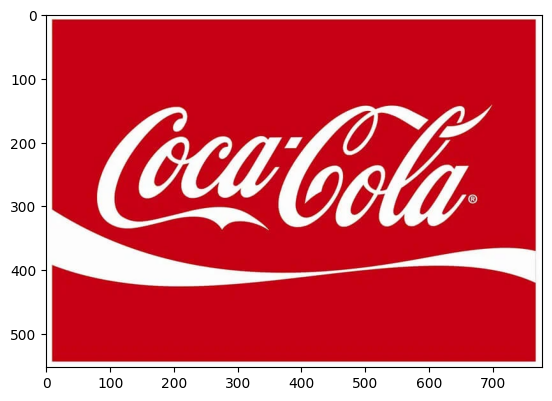

In [10]:
img_rev=c1[:,:,::-1]
plt.imshow(img_rev)

# **Splittiing & Merging Color Channels**

**cv2.split() :** Divids a multi channel array into several single channel arrays.

**cv2.merge() :** Merges several arrays to make a single multi channel array.

Text(0.5, 1.0, 'Merged Output')

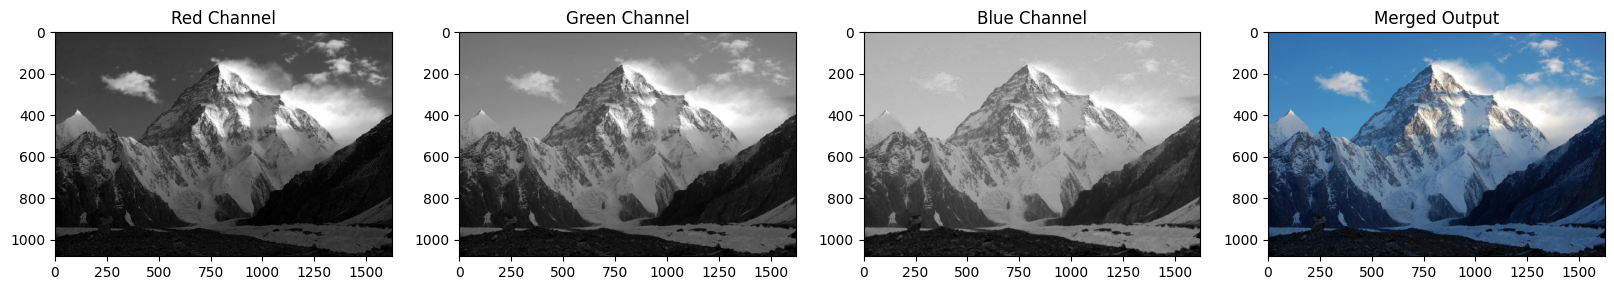

In [11]:
# Splitting image into B,G,R components 
k2_img=cv2.imread("C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/k2_img.png",cv2.IMREAD_COLOR)
b,g,r=cv2.split(k2_img)

# Show the Channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel")
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel")
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel")

# Merge the indiviual channel into a BGR image
imgmerge=cv2.merge((b,g,r))

# Merged O/P
plt.subplot(144);plt.imshow(imgmerge[:,:,::-1]);plt.title("Merged Output")

# **Converting to different color spaces**

**cv2.cvtColor()** Converts an image from one color space to another. The function converts an input image from one color space to another. In ase of transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format ir. is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

**Function Syntax**

dst = cv2.cvtColor(src, code)

**dst:** Is the output image of the same size and depth as src.

The function has 2 required arguments:
1. **src** input image: 8-bit unsigned, 16-bit unsigned (CV_16UC...), or single-precision floating-point.
2. **code** color space conversion code (see ColorConversion Codes).

**Changing from RGB2BGR**

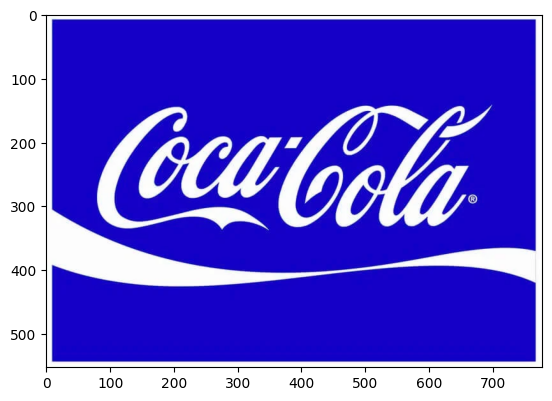

In [42]:
c1=cv2.cvtColor(c1,cv2.COLOR_RGB2BGR)
plt.imshow(c1)

**Changing from BGR2RGB**

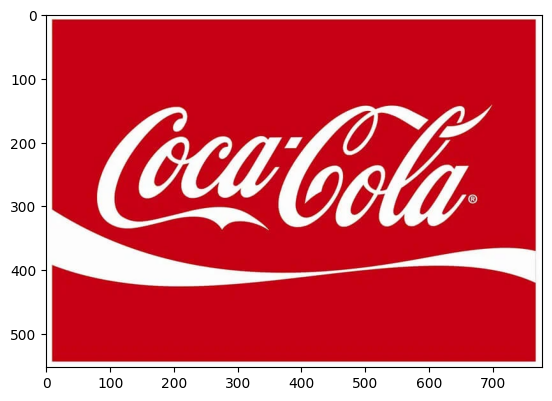

In [43]:
c1=cv2.cvtColor(c1,cv2.COLOR_BGR2RGB)
plt.imshow(c1)

# **RGB vs HSV**
(Red,Green,Blue) Vs (Hue,Saturation,Value)

**RGB**: R → amount of red light  , G → amount of green light  , B → amount of blue light

**HSV**: H → what color it is  , S → how pure the color is  , V → how bright it is




Text(0.5, 1.0, 'V Channel')

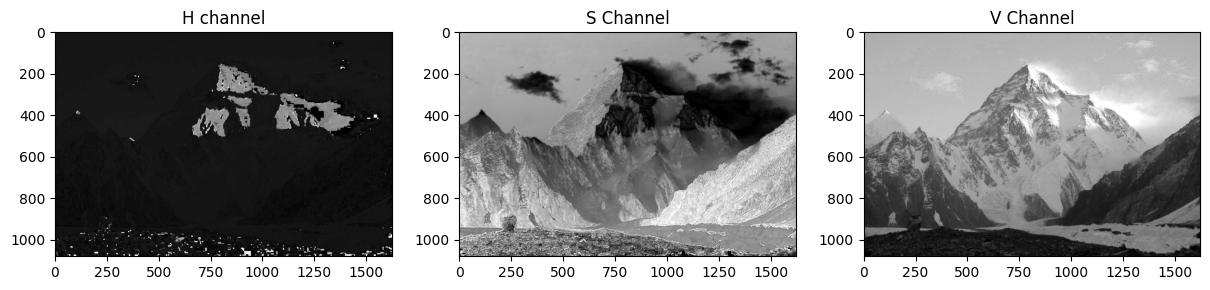

In [24]:
img_hsv=cv2.cvtColor(k2_img,cv2.COLOR_RGB2HSV)

# Split img into B,G,R components
h,s,v=cv2.split(img_hsv)

# Show Channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H channel")
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel")
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel")

# **Modifying Indiviual Color Space**

Text(0.5, 1.0, 'Modified H')

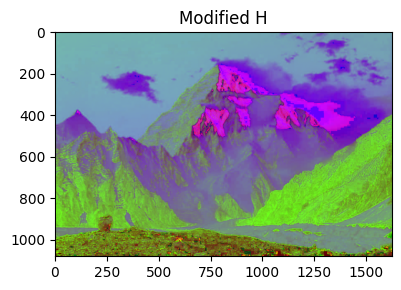

In [72]:
h_new=h+100

# Using modified values of h
k2_img=cv2.merge((h_new,s,v))
plt.figure(figsize=[20,5])
plt.subplot(142);plt.imshow(k2_img);plt.title("Modified H")


# **Saving Images**

Saving the image is as trivial as reading an image in OpenCV. We use the function **cv2.imwrite()** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

**Function Syntax**

cv2.imrite(filename, img[, params))

The function has 2 required arguments:
1. **filename**: This can be an absolute or relative path.
2. **img**: Image or Images to be saved.

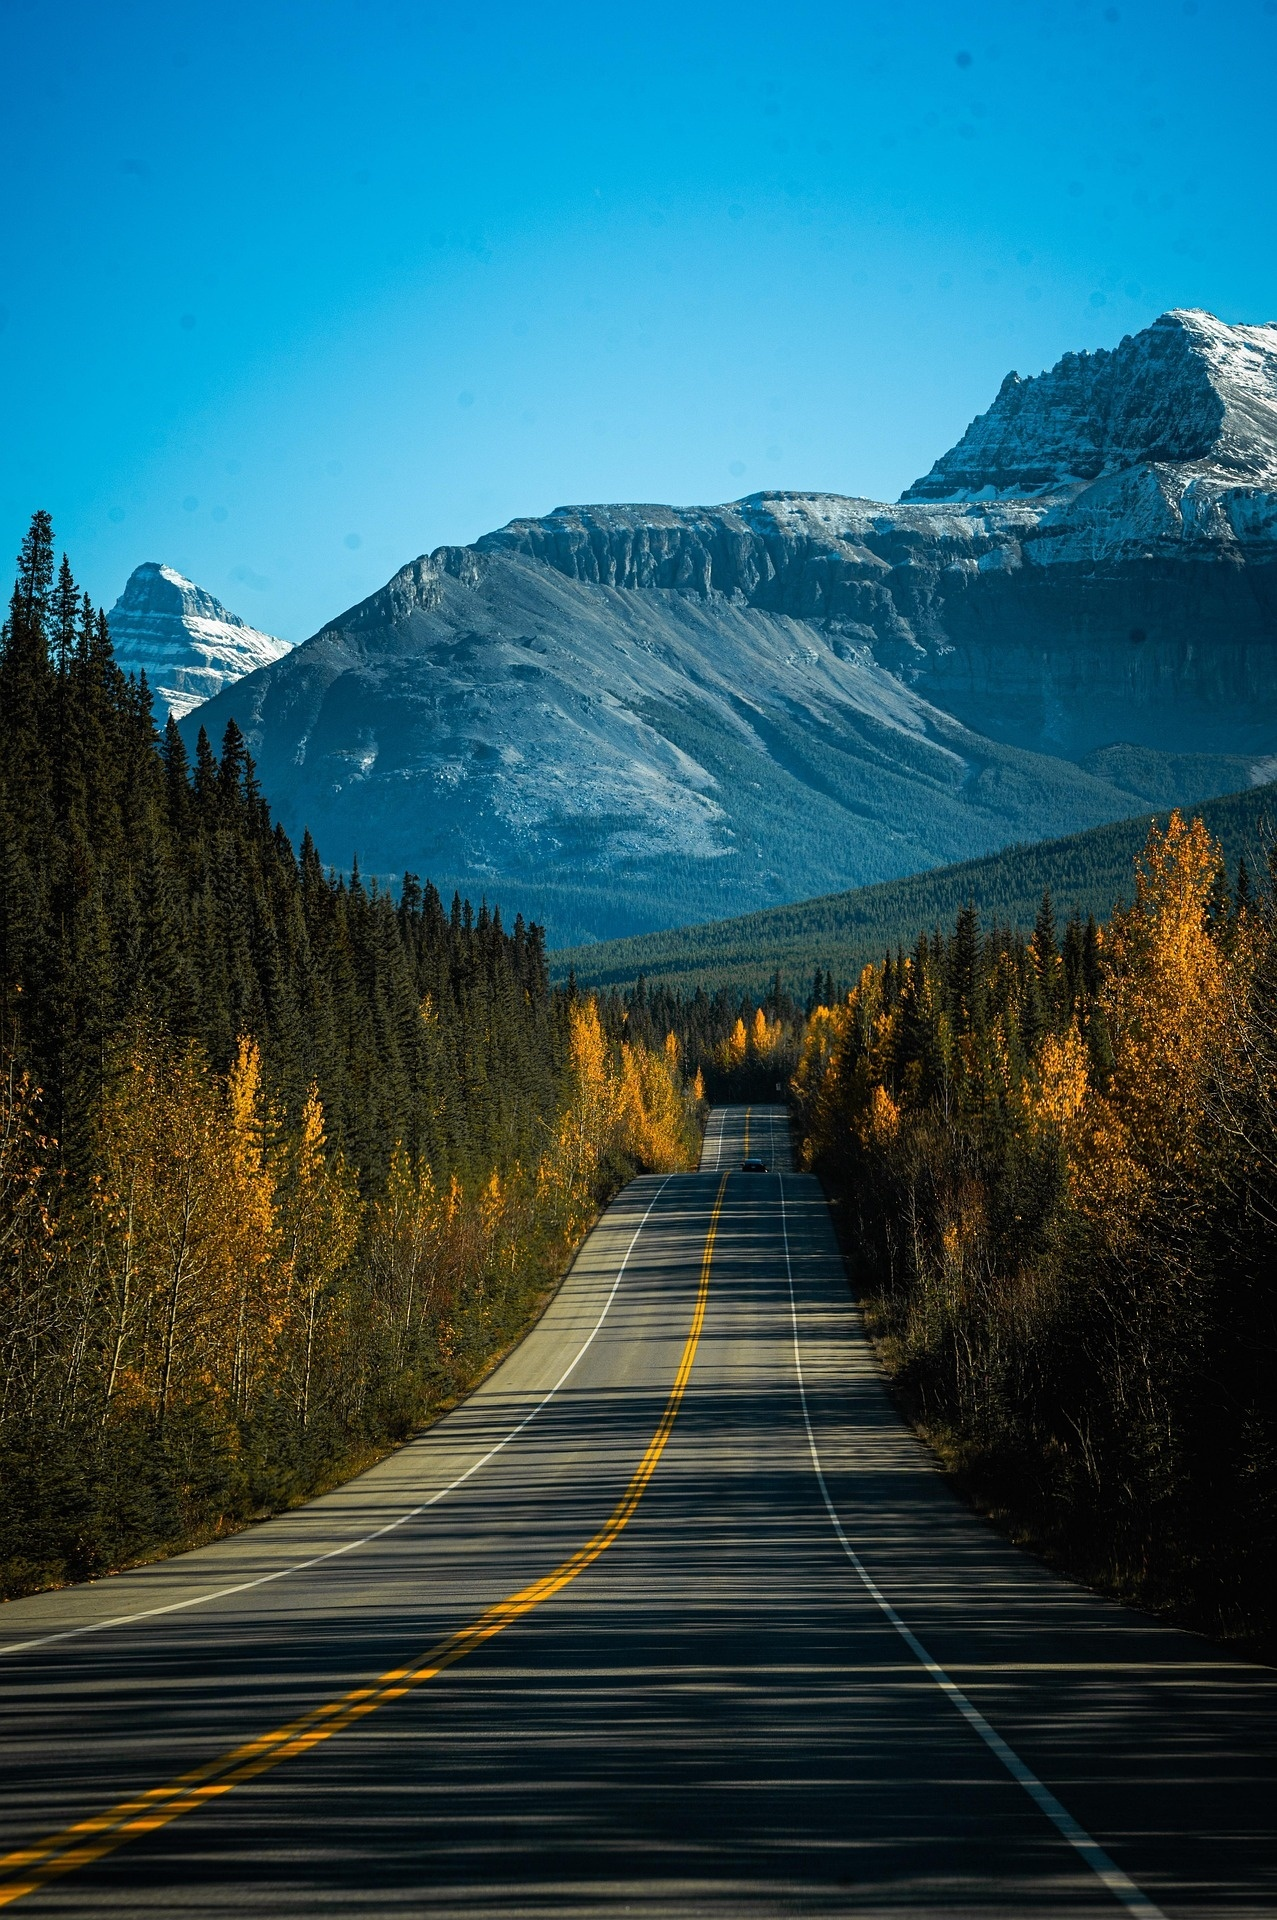

In [84]:
# save image
road=cv2.imread("C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/road.jpg",cv2.IMREAD_COLOR)
cv2.imwrite("road.jpg",road)
Image(filename="road.jpg")